<h1> <center> Choleski Decomposition </center> </h1>

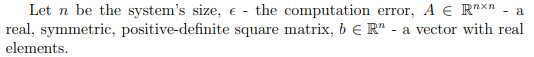

***
### Choleski Decomposition
***

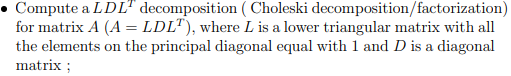

#### Example

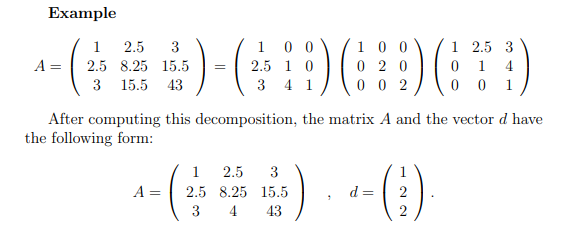

#### Mathematical Explanation

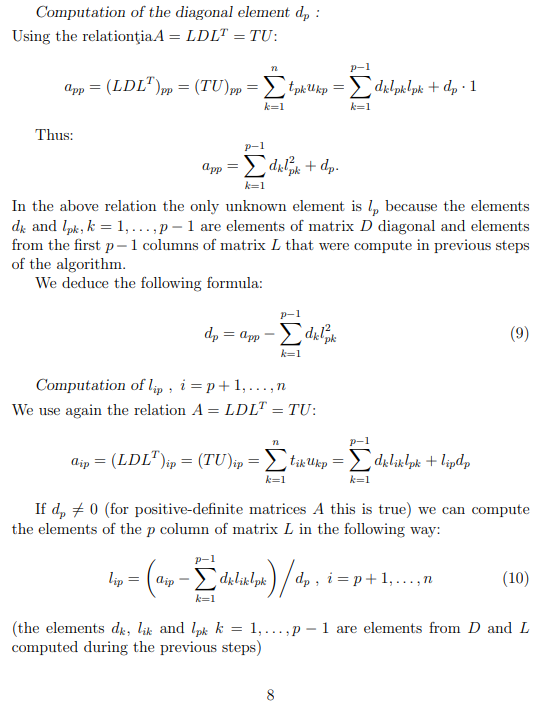

***
#### Python implementation
***

In [5]:
import numpy as np

def compute_cholesky(A):
    n = A.shape[0]
    A_init = np.copy(A)
    A_copy = np.copy(A)
    d = np.zeros(n)

    for p in range(n):
        dp = A_init[p, p]
        for k in range(p):
            dp = dp - d[k] * A_copy[p, k] ** 2
        d[p] = dp

        for i in range(p + 1, n):
            s = 0
            for k in range(p):
                s = s + d[k] * A_init[i, k] * A_copy[p, k]
            A_copy[i, p] = (A_init[i, p] - s) / dp

    return A_copy, d

In [6]:
import numpy as np

A = np.array([  [1, 2.5, 3],
                [2.5, 8.25, 15.5], 
                [3, 15.5, 43]])

print("Initial Matrix:\n", A)
print("Cholesky Decomposition:\n")

A_Cholesky, D = compute_cholesky(A)
print("A:\n", A_Cholesky)
print("D:\n", D)

Initial Matrix:
 [[ 1.    2.5   3.  ]
 [ 2.5   8.25 15.5 ]
 [ 3.   15.5  43.  ]]
Cholesky Decomposition:

A:
 [[ 1.    2.5   3.  ]
 [ 2.5   8.25 15.5 ]
 [ 3.    4.   43.  ]]
D:
 [1. 2. 2.]


***
### Computing the determinant
***

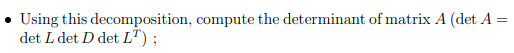

In [7]:
print(" // det A = det(L) * det(D) * det(LT)")
print(" // but, det(L) = det(LT) = 1")
print(" // so, det A = det(D)")
print()
print(" // D is a diagonal matrix, so det(D) = prod(D)")
print()
print("Determinant of A:", np.prod(D))

print(f" // ( D: {D} )")

 // det A = det(L) * det(D) * det(LT)
 // but, det(L) = det(LT) = 1
 // so, det A = det(D)

 // D is a diagonal matrix, so det(D) = prod(D)

Determinant of A: 4.0
 // ( D: [1. 2. 2.] )


***
### Solving Ax = b
***

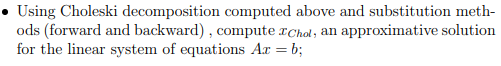

#### Mathematical Explanation

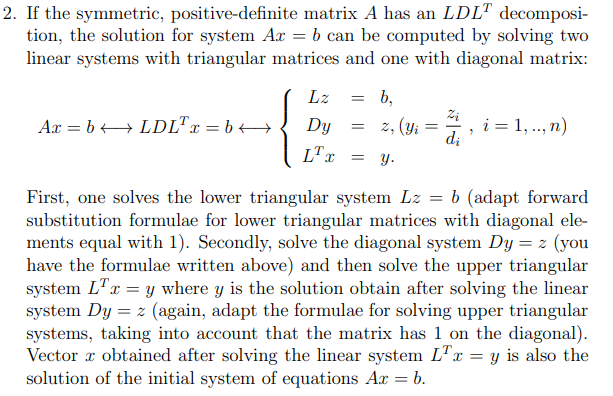

***
#### Python implementation
***

In [8]:
import numpy as np

def solve_equation_system(A, b):
    n = A.shape[0]
    A, D = compute_cholesky(A)
    L = get_L_matrix(A)
    LT = matrix_transpose(L)
    z = np.zeros(n)
    y = np.zeros(n)
    x = np.zeros(n)

    # Lz = b
    for i in range(n):
        s = 0
        for j in range(i):
            s = s + L[i, j] * z[j]
        z[i] = (b[i] - s) / L[i, i]

    # Dy = z
    for i in range(n):
        y[i] = z[i] / D[i]

    # LTx = y for x
    for i in range(n - 1, -1, -1):
        s = 0
        for j in range(i + 1, n):
            s = s + LT[i, j] * x[j]
        x[i] = (y[i] - s) / LT[i, i]

    # print("z:", z)
    # print("y:", y)

    return x

In [54]:
import numpy as np

A = np.array([[1, 2.5, 3], [2.5, 8.25, 15.5], [3, 15.5, 43]])
b = np.array([12, 38, 68])

X_Cholesky = solve_equation_system(A, np.array([12, 38, 68]))
print("Cholesky Solution:\n", X_Cholesky)


Cholesky Solution:
 [2. 4. 0.]


***
### LU Decomposition
***

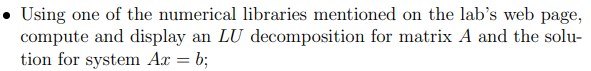

***
#### Python Solution
***

In [9]:
import scipy as sp
import scipy.linalg as la

A = np.array([[1, 2.5, 3], [2.5, 8.25, 15.5], [3, 15.5, 43]])
b = np.array([12, 38, 68])

P, L, U = sp.linalg.lu(A)
print("LU Decomposition for matrix A:\n")
print("P:\n", P)
print("L:\n", L)
print("U:\n", U)

print()

print("Solving Ax = b using LU Decomposition:\n")
X_LU = sp.linalg.solve(A, b)
print("LU solution:\n", X_LU)


LU Decomposition for matrix A:

P:
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
L:
 [[1.         0.         0.        ]
 [0.83333333 1.         0.        ]
 [0.33333333 0.57142857 1.        ]]
U:
 [[  3.          15.5         43.        ]
 [  0.          -4.66666667 -20.33333333]
 [  0.           0.           0.28571429]]

Solving Ax = b using LU Decomposition:

LU solution:
 [2. 4. 0.]


***
### Choleski Solution Verification
***

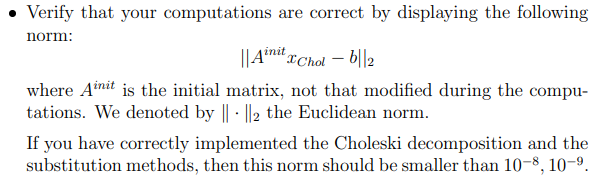

#### Python Solution

In [10]:
import scipy as sp

A = np.array([[1, 2.5, 3], [2.5, 8.25, 15.5], [3, 15.5, 43]])
b = np.array([12, 38, 68])
X_Cholesky = solve_equation_system(A, b)

norm = sp.linalg.norm(A.dot(X_Cholesky) - b)
print("Norm of Ax - b:", norm)

Norm of Ax - b: 0.0


***
### Dominant Diagonal Matrix Generator
***

In [11]:
import numpy as np

def is_diagonally_dominant(matrix):
    n = matrix.shape[0]
    for i in range(n):
        row_sum = np.sum(np.abs(matrix[i, :])) - np.abs(matrix[i, i])
        if np.abs(matrix[i, i]) <= row_sum:
            return False
    return True


def generate_random_matrix(n):
    while True:
        A_random = np.random.rand(n, n)
        if is_diagonally_dominant(A_random @ A_random.T):
            break
    return A_random @ A_random.T

In [12]:
import numpy as np

n = 3
A = generate_random_matrix(n)
b = np.random.rand(n)

A_Cholesky, D = compute_cholesky(A)
print("Cholesky Decomposition:\n")
print("A:\n", A_Cholesky)
print("D:\n", D)



Cholesky Decomposition:

A:
 [[0.43350597 0.16347762 0.11222939]
 [0.37710582 0.28636697 0.05443716]
 [0.25888775 0.1606016  0.20243842]]
D:
 [0.43350597 0.22471861 0.16758746]


***
### is $LDL^T \approx A^{init}$ ?
***

In [13]:
import numpy as np

Ainit = np.array([[1, 2.5, 3], [2.5, 8.25, 15.5], [3, 15.5, 43]])
A, D = compute_cholesky(Ainit)

print("A:\n", A)
print("D:\n", D)

L = get_L_matrix(A)
LDLT = L @ np.diag(D) @ matrix_transpose(L)
print("LDLT:\n", LDLT)

# Checking if abs((LdLT [i, j] - A[i, j])) < 1e-10

for i in range(Ainit.shape[0]):
    for j in range(Ainit.shape[1]):
        if np.abs(LDLT[i, j] - Ainit[i, j]) > 1e-10:
            print("Error in LDLT decomposition")
            break

print("LDLT decomposition is correct")


A:
 [[ 1.    2.5   3.  ]
 [ 2.5   8.25 15.5 ]
 [ 3.    4.   43.  ]]
D:
 [1. 2. 2.]
LDLT:
 [[ 1.    2.5   3.  ]
 [ 2.5   8.25 15.5 ]
 [ 3.   15.5  43.  ]]
LDLT decomposition is correct


***
### Helpful functions
***

In [2]:
import numpy as np

def get_L_matrix(A):
    n = A.shape[0]
    L = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i == j:
                L[i, j] = 1
            elif i > j:
                L[i, j] = A[i, j]
    return L

In [3]:
import numpy as np

def matrix_transpose(A):
    n = A.shape[0]
    m = A.shape[1]
    B = np.zeros((m, n))
    for i in range(n):
        for j in range(m):
            B[j, i] = A[i, j]
    return B

In [4]:
def matrix_determinant(A):
    if A.shape[0] == 2:
        return A[0, 0] * A[1, 1] - A[0, 1] * A[1, 0]
    else:
        det = 0
        for i in range(A.shape[0]):
            det += A[0, i] * matrix_determinant(np.delete(np.delete(A, 0, 0), i, 1)) * (-1) ** i
        return det

# diagonal_matrix_determiant = np.prod(D)
# determinant = matrix_determinant(L) * diagonal_matrix_determiant * matrix_determinant(LT)